Using cpu device.
Train directory: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\train
Validation directory: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation
Setting up image transformations...
Loading datasets...
Number of training samples: 3115
Number of validation samples: 351
Setting batch size to 32...
Data loaders created successfully!
Classes in dataset: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
Number of classes: 36
Initializing CNN model...
CNN model initialized!
CNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), s

C:\Users\T460s\AppData\Local\Temp\ipykernel_6612\121032005.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Processing batch 1/98...
Processing batch 2/98...
Processing batch 3/98...
Processing batch 4/98...
Processing batch 5/98...
Processing batch 6/98...
Processing batch 7/98...
Processing batch 8/98...
Processing batch 9/98...
Processing batch 10/98...
Processing batch 11/98...
Processing batch 12/98...
Processing batch 13/98...
Processing batch 14/98...
Processing batch 15/98...
Processing batch 16/98...
Processing batch 17/98...
Processing batch 18/98...
Processing batch 19/98...
Processing batch 20/98...
Processing batch 21/98...
Processing batch 22/98...
Processing batch 23/98...
Processing batch 24/98...
Processing batch 25/98...
Processing batch 26/98...
Processing batch 27/98...
Processing batch 28/98...
Processing batch 29/98...
Processing batch 30/98...
Processing batch 31/98...
Processing batch 32/98...
Processing batch 33/98...
Processing batch 34/98...
Processing batch 35/98...
Processing batch 36/98...
Processing batch 37/98...
Processing batch 38/98...
Processing batch 39/9

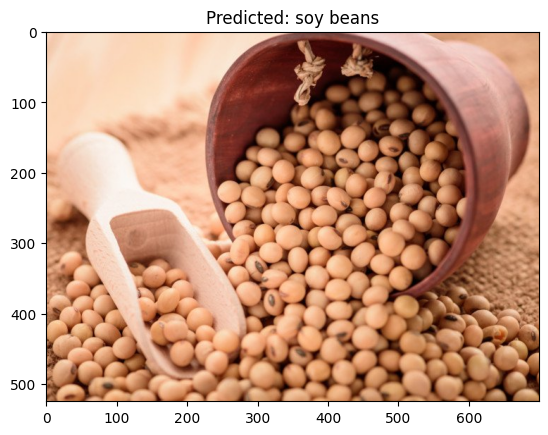

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\soy beans\Image_9.jpg


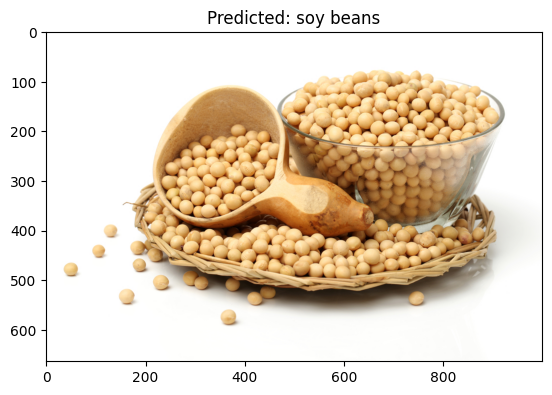

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\bell pepper\Image_2.jpg


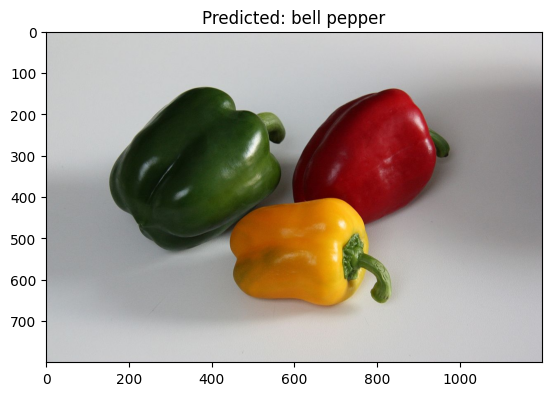

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\spinach\Image_10.jpg


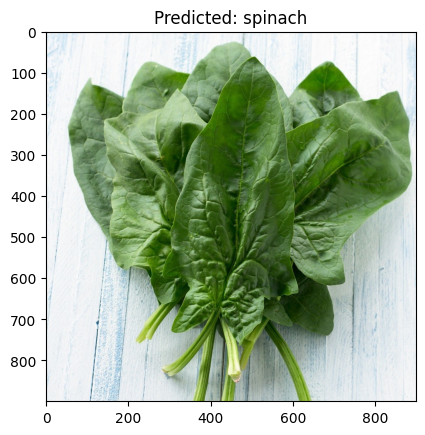

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\pineapple\Image_7.jpg


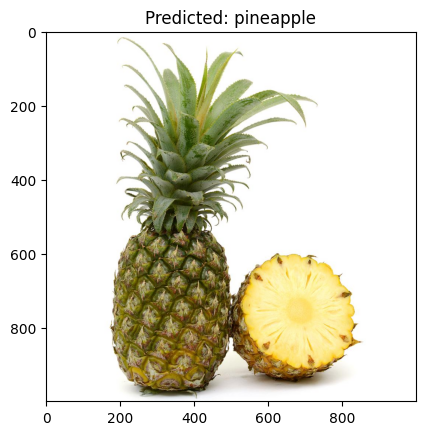

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\beetroot\Image_3.jpg


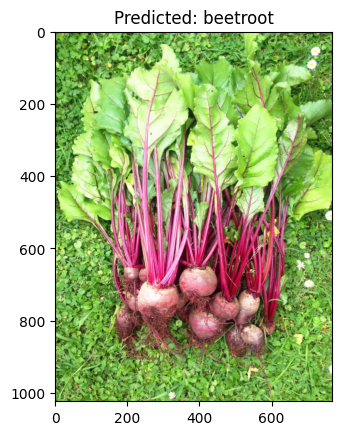

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\pear\Image_4.jpg


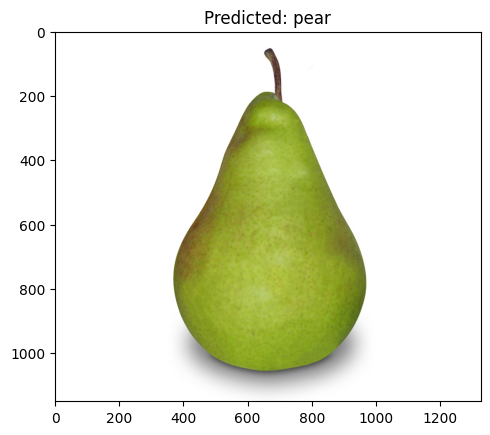

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\turnip\Image_7.jpg


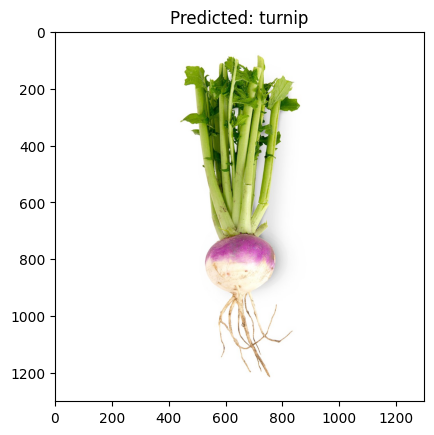

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\peas\Image_8.jpg


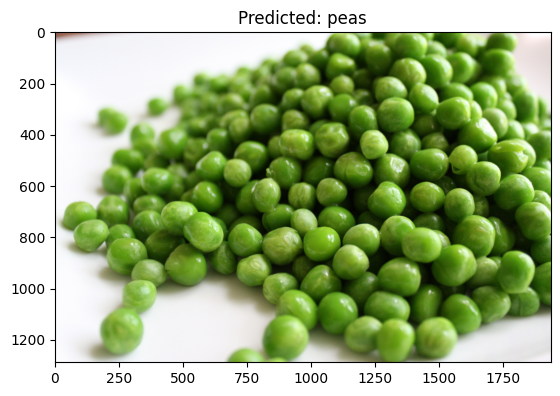

Predicting for image: C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive\validation\watermelon\Image_3.jpg


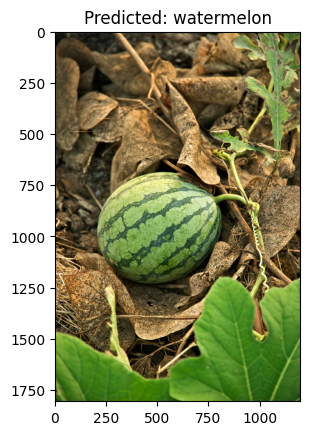

In [7]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch.optim import Adam
from sklearn.metrics import classification_report
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device.")


data_path = Path(r"C:\Users\T460s\Desktop\6th Semester\Machine Learning\fruitsandvegetables\archive")
train_dir = data_path / "train"
validation_dir = data_path / "validation"
print(f"Train directory: {train_dir}")
print(f"Validation directory: {validation_dir}")


print("Setting up image transformations...")
transform = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.ToTensor(),          
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  
])


print("Loading datasets...")
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(root=validation_dir, transform=transform)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(validation_dataset)}")


batch_size = 32
print(f"Setting batch size to {batch_size}...")
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
print("Data loaders created successfully!")


class_names = train_dataset.classes
print(f"Classes in dataset: {class_names}")


class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        print("Initializing CNN model...")
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 512),  
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
        print("CNN model initialized!")

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x



num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
model = CNNModel(num_classes).to(device)
print(model)


criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
print("Loss function and optimizer initialized.")


model_path = "fruits_vegetables_model.pth"
try:
    model.load_state_dict(torch.load(model_path))
    model.eval()
    print(f"Loaded pre-trained model from {model_path}")
except FileNotFoundError:
    print(f"Model not found. Training a new model...")
    # Training the model
    def train_model(model, train_loader, validation_loader, criterion, optimizer, epochs=10):
        print(f"Starting training for {epochs} epochs...")
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            model.train()
            train_loss, train_correct = 0, 0
            for batch_idx, (images, labels) in enumerate(train_loader):
                print(f"Processing batch {batch_idx + 1}/{len(train_loader)}...")
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                train_correct += torch.sum(preds == labels).item()

            # Validation
            model.eval()
            val_loss, val_correct = 0, 0
            with torch.no_grad():
                for batch_idx, (images, labels) in enumerate(validation_loader):
                    print(f"Validating batch {batch_idx + 1}/{len(validation_loader)}...")
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, preds = torch.max(outputs, 1)
                    val_correct += torch.sum(preds == labels).item()

            print(f"Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_correct / len(train_dataset):.4f}")
            print(f"Val Loss: {val_loss / len(validation_loader):.4f}, Val Accuracy: {val_correct / len(validation_dataset):.4f}")

    train_model(model, train_loader, validation_loader, criterion, optimizer, epochs=10)

    # Save the trained model
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}.")


def evaluate_model(model, validation_loader):
    print("Evaluating model on validation data...")
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))


evaluate_model(model, validation_loader)



def predict_image(image_path, model, transform):
    print(f"Predicting for image: {image_path}")
    model.eval()
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image_tensor)
        _, pred = torch.max(output, 1)
    return class_names[pred]

def display_image_with_prediction(image_path, model, transform):
    # Display image
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)
    predicted_class = predict_image(image_path, model, transform)
    plt.title(f"Predicted: {predicted_class}")
    plt.show()


print("Predicting for 10 random images...")
for _ in range(10):
    random_idx = random.randint(0, len(validation_dataset.samples) - 1)
    sample_image = validation_dataset.samples[random_idx][0]
    display_image_with_prediction(sample_image, model, transform)



if not Path(model_path).exists():
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}.")
